In [17]:
import requests
import pandas as pd

# can get data from most recent settlement period, but limited by demand +1H after
end_date = pd.Timestamp.now()
settlementDate = (end_date - pd.Timedelta(hours=0.5)).date()
settlementPeriod = (end_date - pd.Timedelta(hours=0.5)).hour * 2

# options - 'PN', 'QPN', 'MILS', 'MELS
dataset = 'PN'

web = 'https://data.elexon.co.uk/bmrs/api/v1/balancing/physical/all?dataset=' + dataset + '&settlementDate=' + str(settlementDate) + '&settlementPeriod=' + str(settlementPeriod) + '&format=json'

r = requests.get(web)
df = pd.DataFrame(r.json()['data'])
# df.index = df['nationalGridBmUnit']
df.set_index('nationalGridBmUnit', inplace=True)
df

,dataset,settlementDate,settlementPeriod,timeFrom,timeTo,levelFrom,levelTo,bmUnit
nationalGridBmUnit,,,,,,,,
CRSSB-1,PN,2024-02-02,22,2024-02-02T10:59:00Z,2024-02-02T11:00:00Z,0,-1,E_CRSSB-1
CLDSW-1,PN,2024-02-02,22,2024-02-02T10:59:00Z,2024-02-02T11:00:00Z,119,120,T_CLDSW-1
GRGBW-1,PN,2024-02-02,22,2024-02-02T10:59:00Z,2024-02-02T11:00:00Z,138,137,T_GRGBW-1
GRGBW-2,PN,2024-02-02,22,2024-02-02T10:59:00Z,2024-02-02T11:00:00Z,138,137,T_GRGBW-2
GRGBW-3,PN,2024-02-02,22,2024-02-02T10:59:00Z,2024-02-02T11:00:00Z,138,137,T_GRGBW-3
...,...,...,...,...,...,...,...,...
AG-FLX02N,PN,2024-02-02,22,2024-02-02T10:30:00Z,2024-02-02T11:00:00Z,0,0,V__NFLEX001
AG-FLX07N,PN,2024-02-02,22,2024-02-02T10:30:00Z,2024-02-02T11:00:00Z,0,0,V__NFLEX002
AG-HEL0DN,PN,2024-02-02,22,2024-02-02T10:30:00Z,2024-02-02T11:00:00Z,0,0,V__NHABI005


<Axes: title={'center': 'Final Physical Notification Level (MW)'}, xlabel='nationalGridBmUnit'>

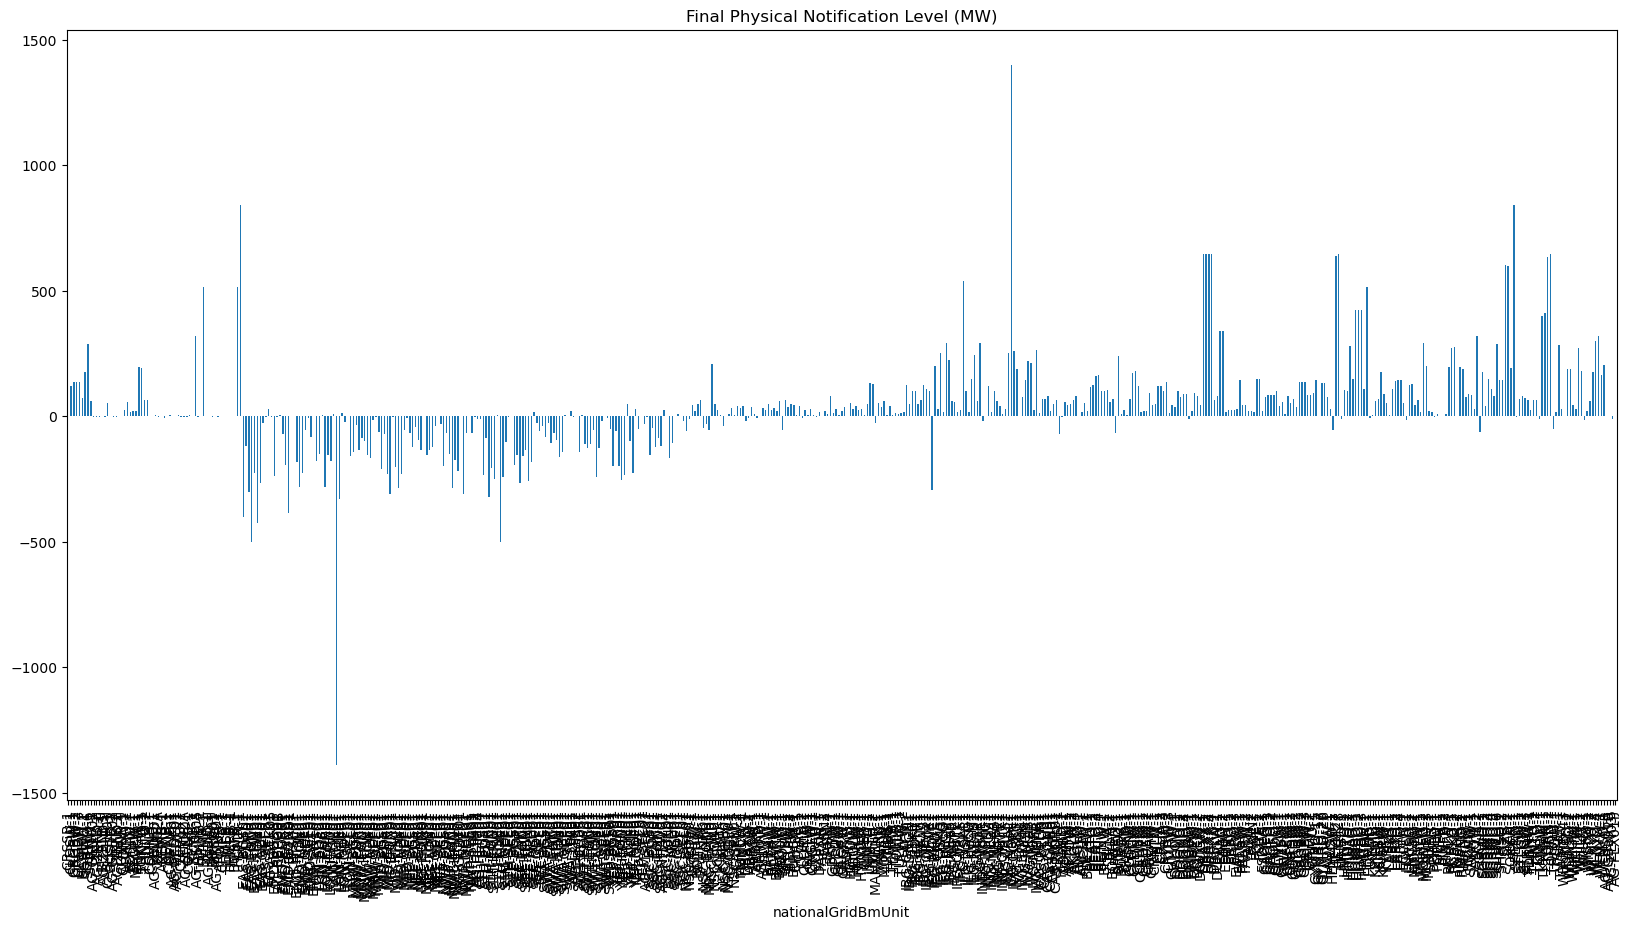

In [18]:
ds_plot = df['levelTo'].dropna().astype('float')
ds_plot[ds_plot != 0].plot(kind='bar', figsize=(20, 10), title='Final Physical Notification Level (MW)')

<Axes: title={'center': 'Final Physical Notification Level (MW) > 0  (Generation)'}, xlabel='nationalGridBmUnit'>

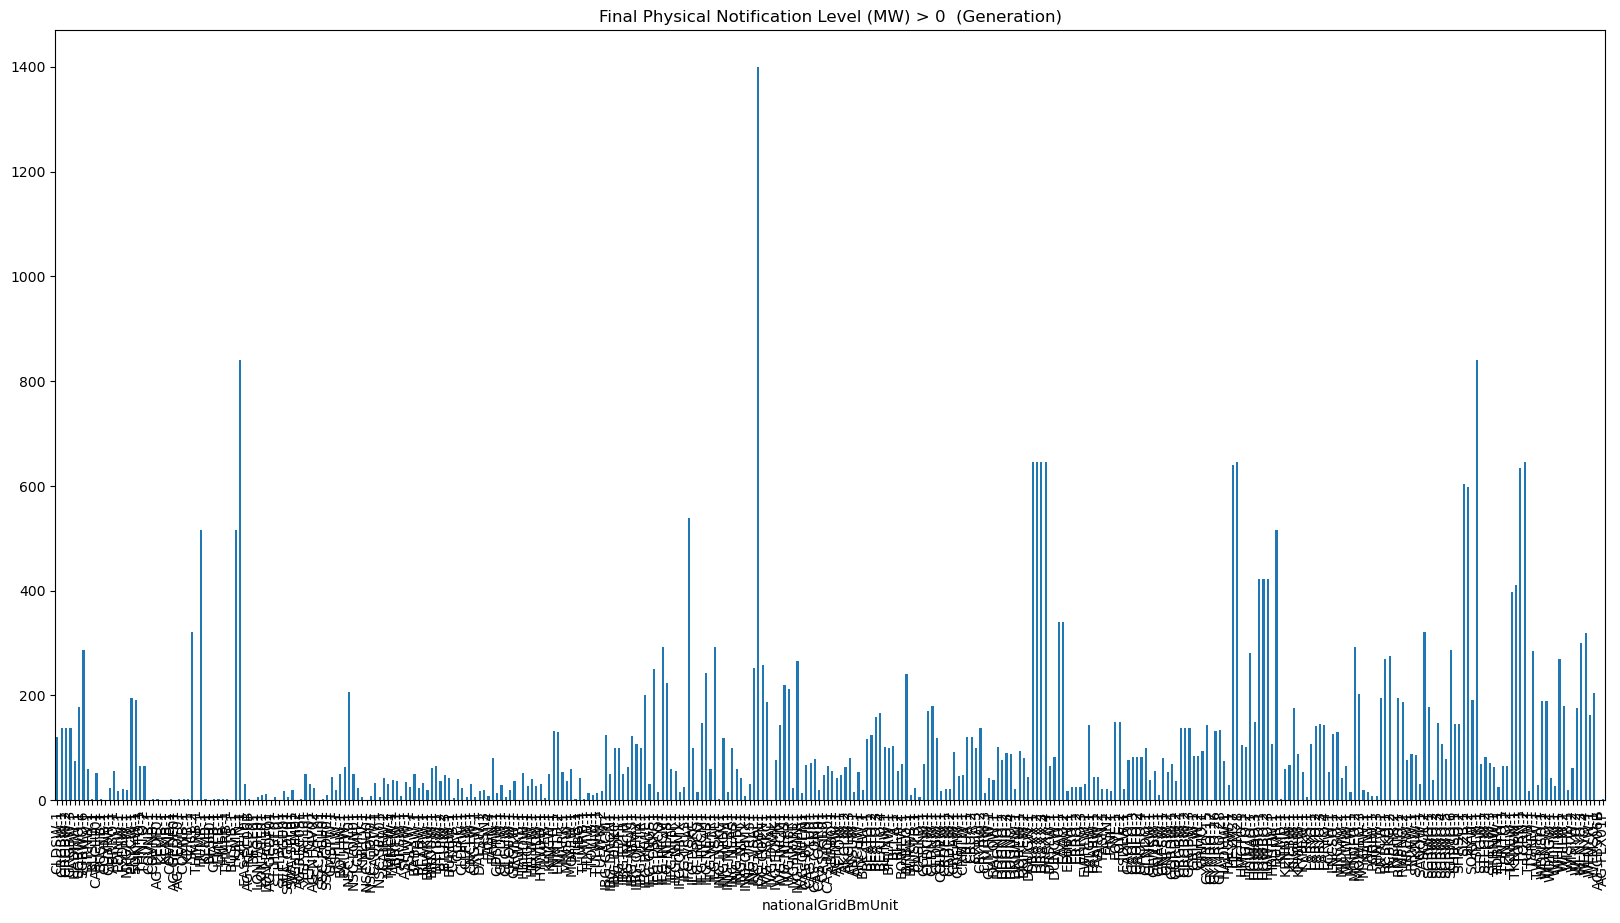

In [19]:
ds_plot[ds_plot > 0].plot(kind='bar', figsize=(20, 10), title='Final Physical Notification Level (MW) > 0  (Generation)')

In [20]:
ds_plot[ds_plot > 0].sum()

39200.0

<Axes: title={'center': 'Final Physical Notification Level (MW) < 0  (Demand)'}, xlabel='nationalGridBmUnit'>

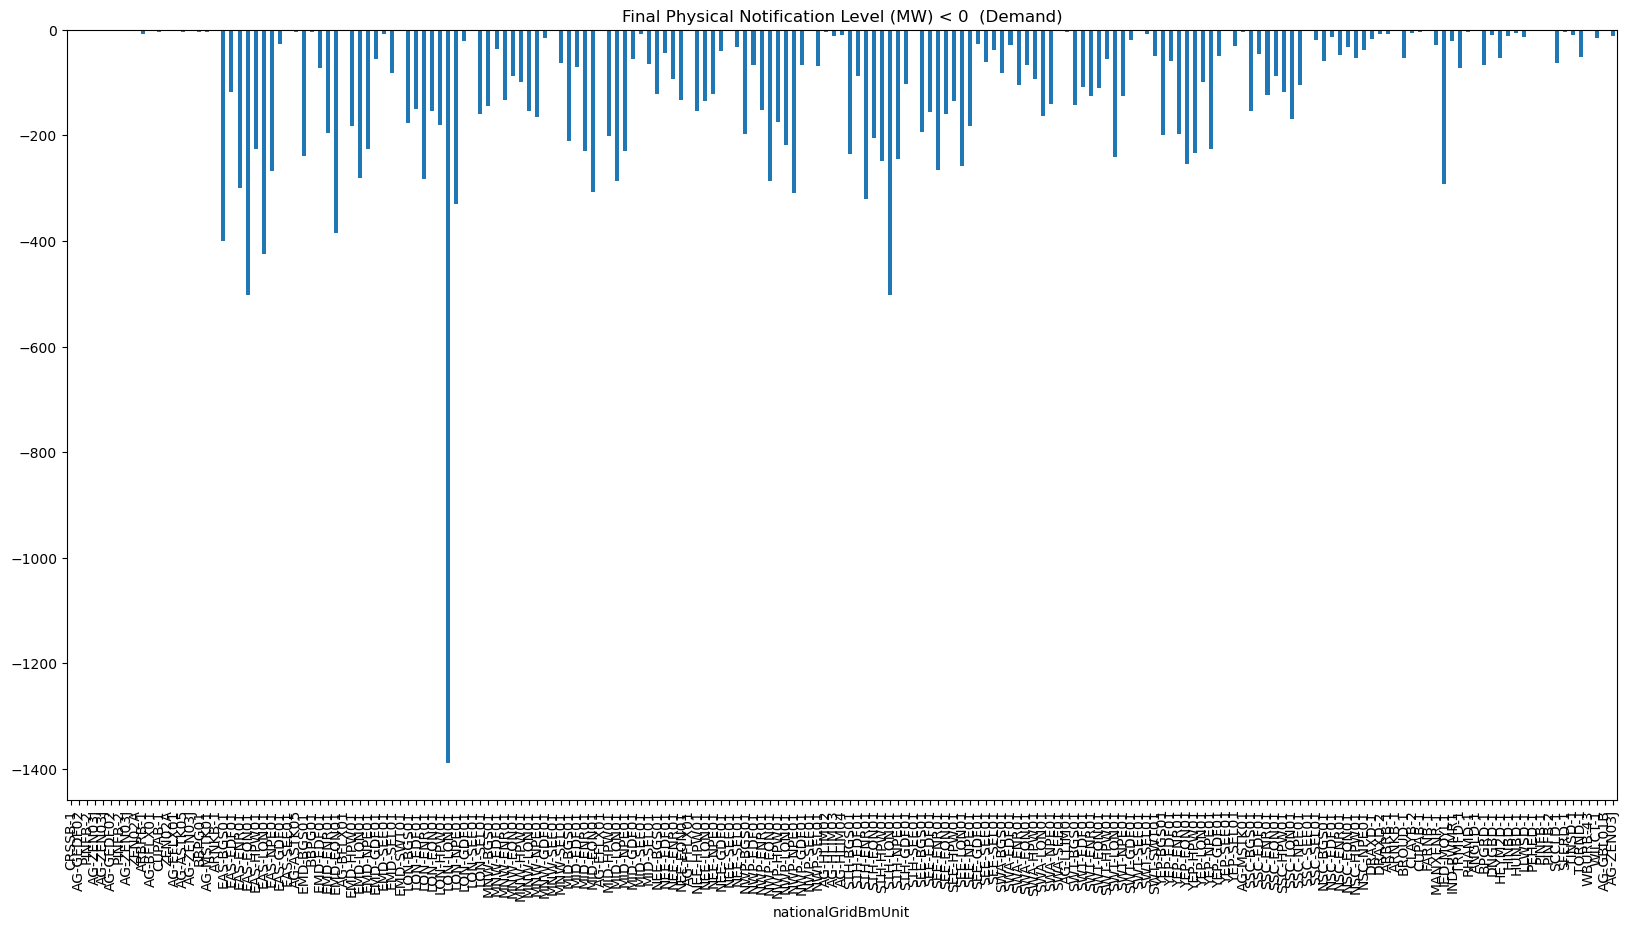

In [21]:
ds_plot[ds_plot < 0].plot(kind='bar', figsize=(20, 10), title='Final Physical Notification Level (MW) < 0  (Demand)')

In [22]:
ds_plot[ds_plot < 0].sum()

-20244.0